## Problem Statement
The dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. 
The classification goal is to predict whether the patient has a 10-year risk of future Coronary Heart Disease (CHD). 
The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes. Each attribute is a potential risk factor. 
There are both demographic, behavioral, and medical risk factors.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression     #  same for LinearRegression
from sklearn.model_selection import train_test_split   # data split into train_test

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report#classification_report = precision and recall
from sklearn.metrics import roc_auc_score, roc_curve, precision_score, recall_score # evalution matrix  # evalution matrix

import matplotlib.pyplot as plt #for visualiazation
import seaborn as sns  # for visualiazation

import warnings                   # for ignore the warnings we import the liaberery
warnings.filterwarnings('ignore') # # for ignore the warnings we import the liaberery

In [2]:
df = pd.read_csv('cardio.csv')
df

id  age  education sex is_smoking  cigsPerDay  BPMeds  \
0        0   64        2.0   F        YES         3.0     0.0   
1        1   36        4.0   M         NO         0.0     0.0   
2        2   46        1.0   F        YES        10.0     0.0   
3        3   50        1.0   M        YES        20.0     0.0   
4        4   64        1.0   F        YES        30.0     0.0   
...    ...  ...        ...  ..        ...         ...     ...   
3385  3385   60        1.0   F         NO         0.0     0.0   
3386  3386   46        1.0   F         NO         0.0     0.0   
3387  3387   44        3.0   M        YES         3.0     0.0   
3388  3388   60        1.0   M         NO         0.0     NaN   
3389  3389   54        3.0   F         NO         0.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
0                   0             0         0    221.0  148.0   85.0    NaN   
1                   0             1         0    212.0  168.0   98.0  29.77   
2                   0             0         0    250.0  116.0   71.0  20.35   
3                   0             1         0    233.0  158.0   88.0  28.26   
4                   0             0         0    241.0  136.5   85.0  26.42   
...               ...           ...       ...      ...    ...    ...    ...   
3385                0             0         0    261.0  123.5   79.0  29.28   
3386                0             0         0    199.0  102.0   56.0  21.96   
3387                0             1         0    352.0  164.0  119.0  28.92   
3388                0             1         0    191.0  167.0  105.0  23.01   
3389                0             0         0    288.0  124.0   77.0  29.88   

      heartRate  glucose  TenYearCHD  
0          90.0     80.0           1  
1          72.0     75.0           0  
2          88.0     94.0           0  
3          68.0     94.0           1  
4          70.0     77.0           0  
...         ...      ...         ...  
3385       70.0    103.0           0  
3386       80.0     84.0           0  
3387       73.0     72.0           1  
3388       80.0     85.0           0  
3389       79.0     92.0           0  

[3390 rows x 17 columns]

In [3]:
df.TenYearCHD.value_counts()

TenYearCHD
0    2879
1     511
Name: count, dtype: int64

## EDA

In [4]:
df['TenYearCHD'].value_counts()

TenYearCHD
0    2879
1     511
Name: count, dtype: int64

Here who has not TenyearCHD this count show with 0 and this count is "2714" & the who has TenyearCHD count show with 1 this count is "475" (CHD - Coronary Heart Disease)

<Axes: xlabel='TenYearCHD', ylabel='Count'>

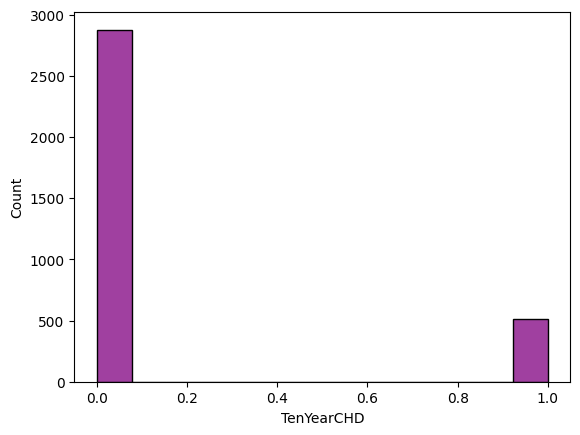

In [5]:
sns.histplot(df['TenYearCHD'],color="purple") # for plotting the values in histogram

here above 2500 patients have not TenYearCHD & 500 patients have TenYearCHD (Coronary Heart Disease)

<function matplotlib.pyplot.show(close=None, block=None)>

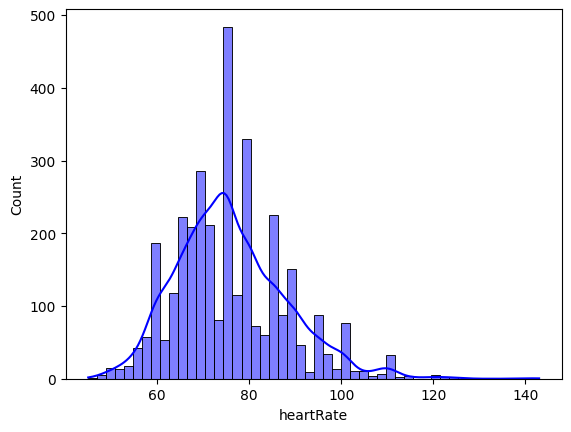

In [6]:
sns.histplot(data=df,x='heartRate',color="blue", kde=True);
plt.show

In this plot the 79 heartRate the count is above 400  

In [7]:
df['sex'].value_counts()

sex
F    1923
M    1467
Name: count, dtype: int64

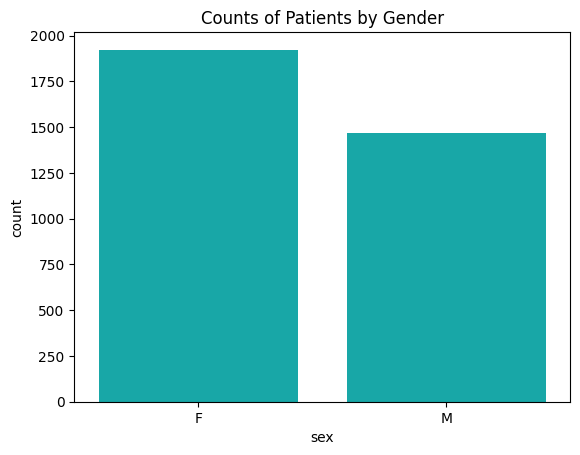

In [8]:
sns.countplot(data=df,x='sex',color="c")
plt.title("Counts of Patients by Gender")
plt.show()

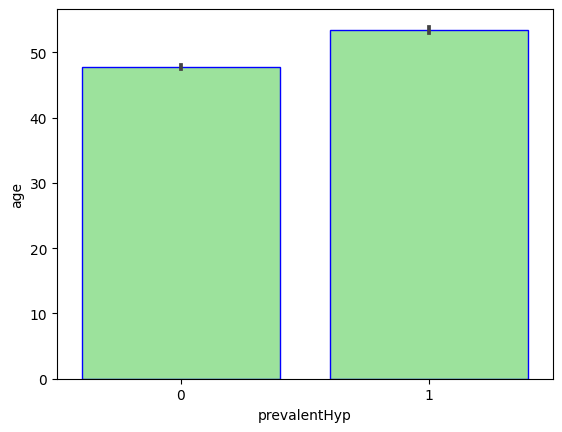

In [9]:
sns.barplot(x='prevalentHyp',y='age',data=df,color="lightgreen",edgecolor="blue")
plt.show()

Here in Countplot shows the agewise prevalentHyp means here upto 48 years people have no prevalentHyp here above 50 years people have prevalentHyp (prevalentHyp - if the patient has history of Hypertension)

<Axes: xlabel='heartRate', ylabel='Density'>

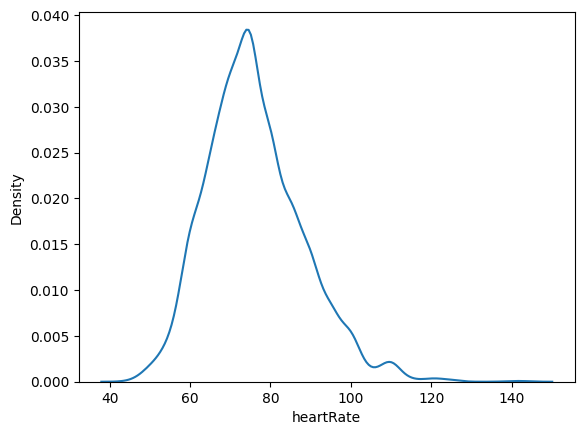

In [10]:
sns.kdeplot(x=df['heartRate'])

In this plot the heartRate of 80 count is above 0.035

In [11]:
df['sex'].value_counts()

sex
F    1923
M    1467
Name: count, dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

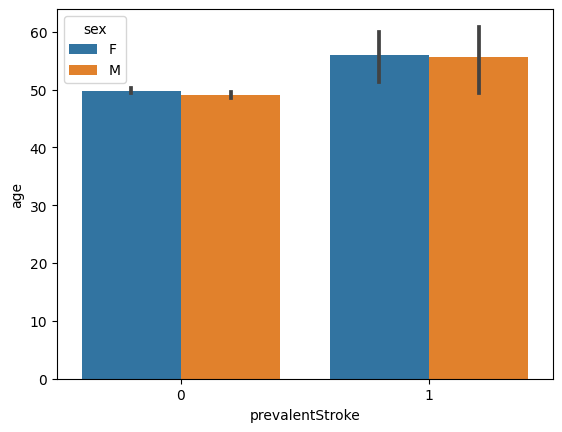

In [13]:
sns.barplot(x='prevalentStroke',y='age',data=df,hue='sex')
plt.show()

In this plot 0 (female)  & 1 (male)  & Blue(female)   Orange (male)   
It shows the Female have not TenYearCHD upto 49 yeras 
& Male have not TenYearCHD upto 48 years 

It shows the Female have TenYearCHD upto 50 yeras 
& Male have TenYearCHD upto 50 years also



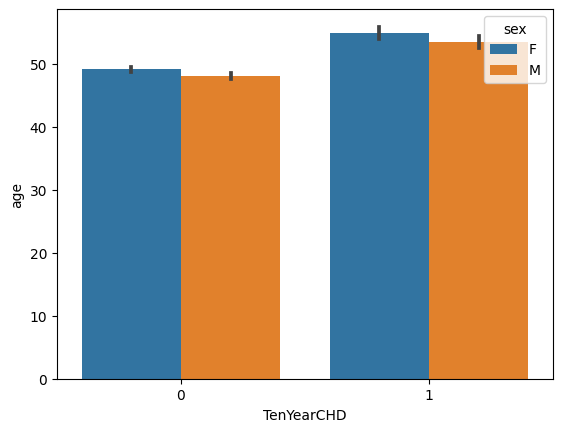

In [14]:
sns.barplot(x='TenYearCHD',y='age',data=df,hue='sex')
plt.show()

In this plot 0 (female) & 1 (male) & Blue(female) Orange (male)
It shows the Female have not TenYearCHD upto 49 yeras & Male have not TenYearCHD upto 48 years

It shows the Female have TenYearCHD upto 50 yeras & Male have TenYearCHD upto 50 years also

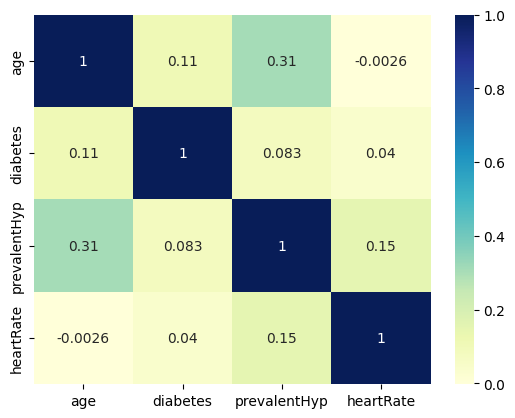

In [15]:
sns.heatmap(data=df[['age','diabetes','prevalentHyp','heartRate']].corr(), annot=True, cmap='YlGnBu');

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

<Axes: xlabel='TenYearCHD', ylabel='count'>

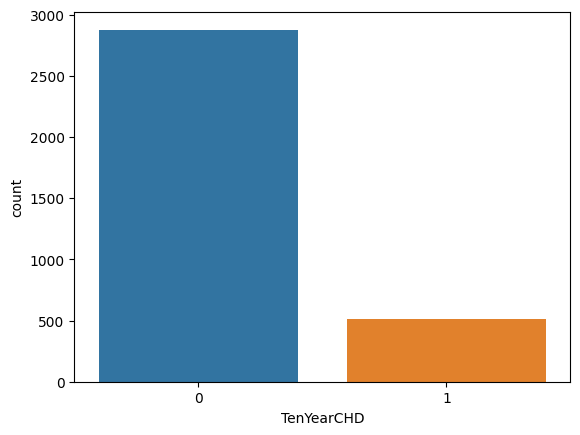

In [17]:
sns.countplot(x='TenYearCHD',data=df)


Here is the count of patients they have not TenYearCHD is 2500 above 
and count of patients they have TenYearCHD is 500

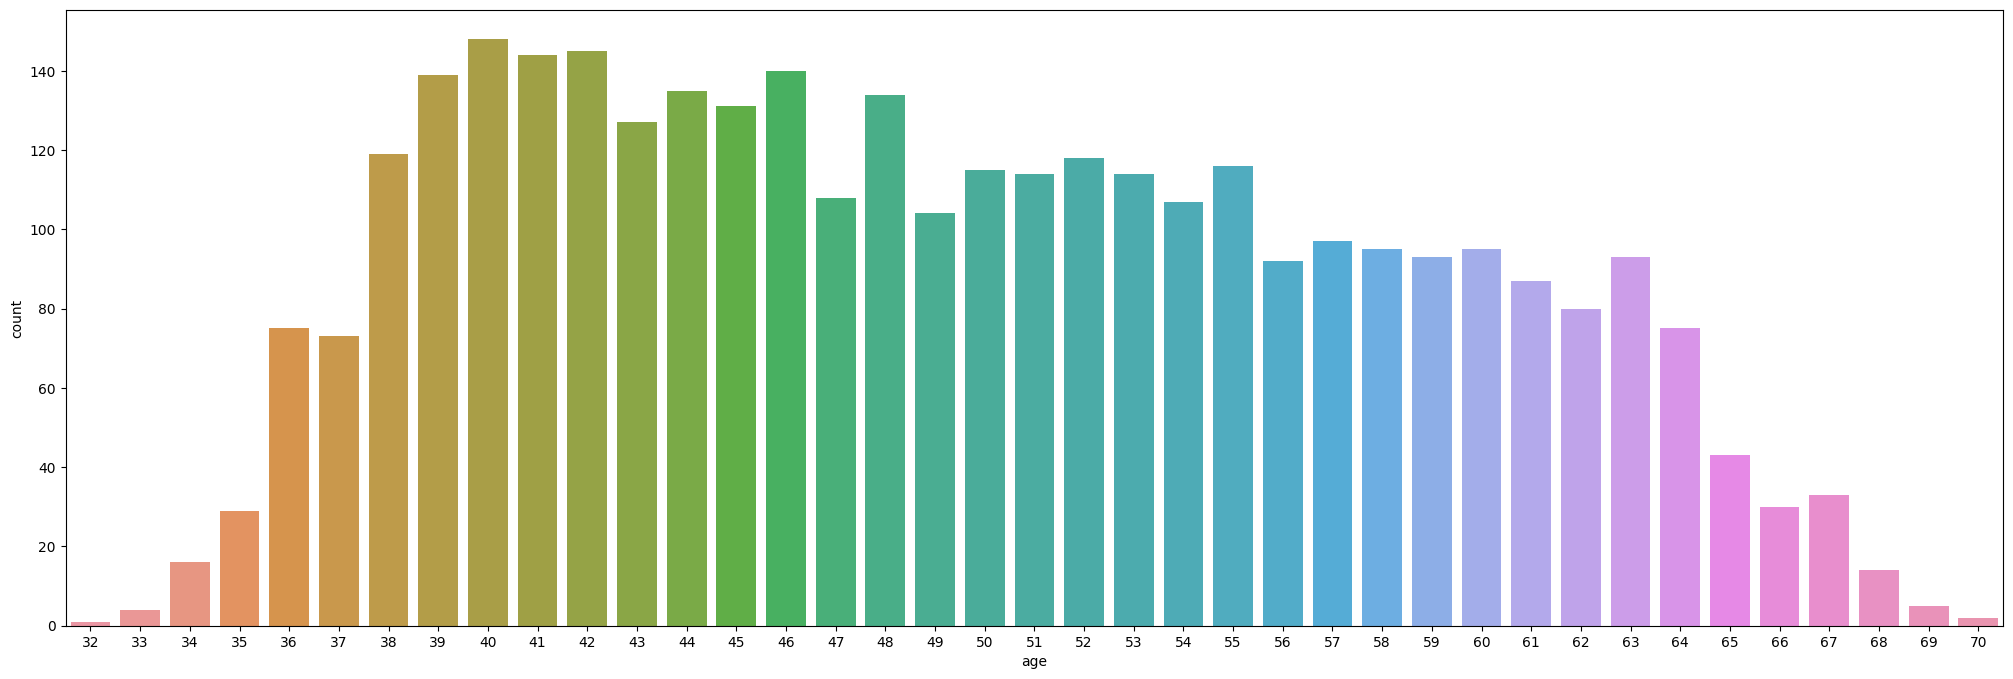

In [18]:
plt.figure(figsize=(25,8))
sns.countplot(data=df, x='age');

Here is the count of patients they have not "TenYearCHD" in between 43 to 55
and count of patients they have "TenYearCHD" in between 43 to 60

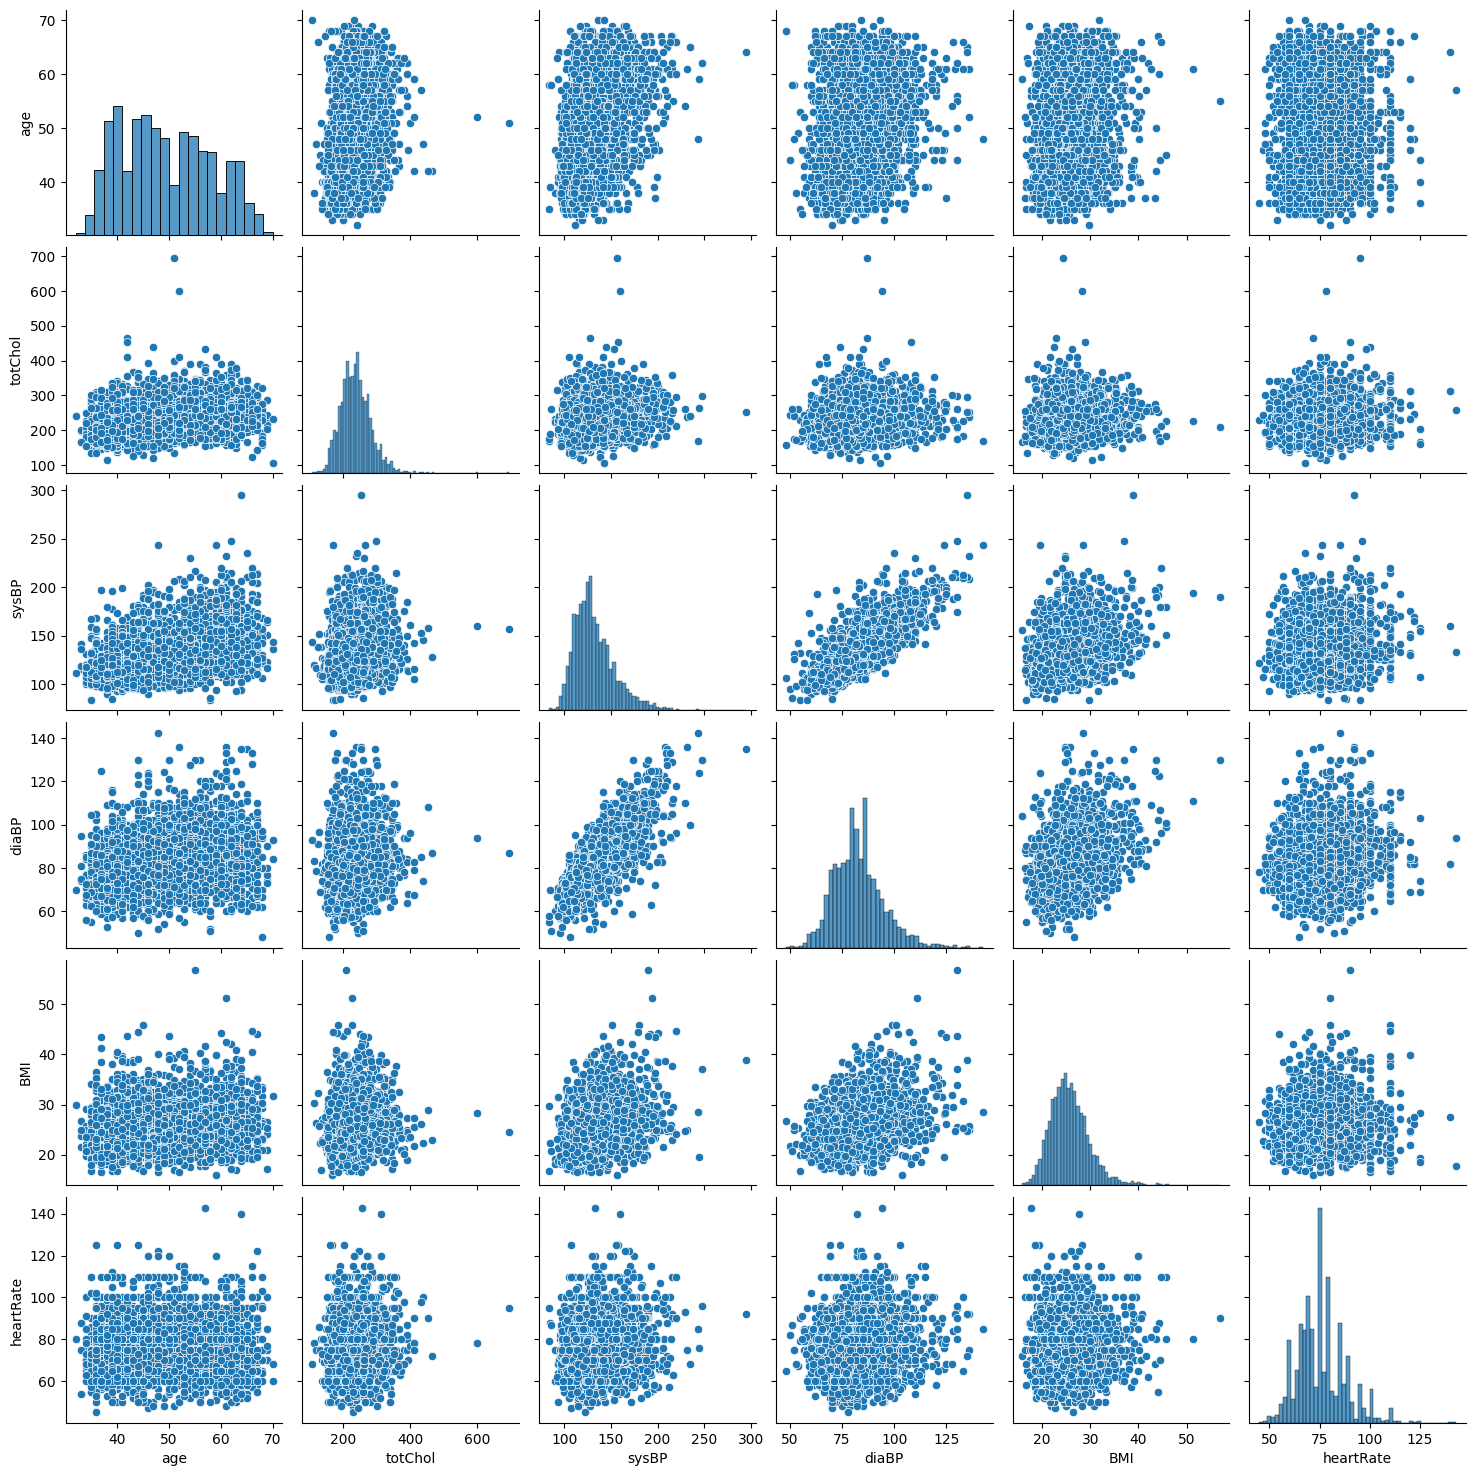

In [19]:
sns.pairplot(data=df[['age','totChol','sysBP','diaBP','BMI','heartRate']])

## Handling Missing Values

In [20]:
print(df.isnull().sum())

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64


In [21]:
df['glucose'].fillna(df['glucose'].median(),inplace=True)


In [22]:
df.dropna(subset=['education','cigsPerDay','BPMeds','totChol','BMI','heartRate'],inplace=True)

In [23]:
df.info() # check the data

<class 'pandas.core.frame.DataFrame'>
Index: 3189 entries, 1 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3189 non-null   int64  
 1   age              3189 non-null   int64  
 2   education        3189 non-null   float64
 3   sex              3189 non-null   object 
 4   is_smoking       3189 non-null   object 
 5   cigsPerDay       3189 non-null   float64
 6   BPMeds           3189 non-null   float64
 7   prevalentStroke  3189 non-null   int64  
 8   prevalentHyp     3189 non-null   int64  
 9   diabetes         3189 non-null   int64  
 10  totChol          3189 non-null   float64
 11  sysBP            3189 non-null   float64
 12  diaBP            3189 non-null   float64
 13  BMI              3189 non-null   float64
 14  heartRate        3189 non-null   float64
 15  glucose          3189 non-null   float64
 16  TenYearCHD       3189 non-null   int64  
dtypes: float64(9), int6

In [24]:
df['sex'].replace({'F':0, 'M':1}, inplace=True)# label encoding
df['is_smoking'].replace({'NO':0, 'YES':1}, inplace=True)# label encoding

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3189 entries, 1 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3189 non-null   int64  
 1   age              3189 non-null   int64  
 2   education        3189 non-null   float64
 3   sex              3189 non-null   int64  
 4   is_smoking       3189 non-null   int64  
 5   cigsPerDay       3189 non-null   float64
 6   BPMeds           3189 non-null   float64
 7   prevalentStroke  3189 non-null   int64  
 8   prevalentHyp     3189 non-null   int64  
 9   diabetes         3189 non-null   int64  
 10  totChol          3189 non-null   float64
 11  sysBP            3189 non-null   float64
 12  diaBP            3189 non-null   float64
 13  BMI              3189 non-null   float64
 14  heartRate        3189 non-null   float64
 15  glucose          3189 non-null   float64
 16  TenYearCHD       3189 non-null   int64  
dtypes: float64(9), int6

In [26]:
df['TenYearCHD'].unique() # here TenYearCHD is a target or TenYearCHD or depedent variable  = y

array([0, 1], dtype=int64)

## Outliers checking

<Axes: xlabel='glucose'>

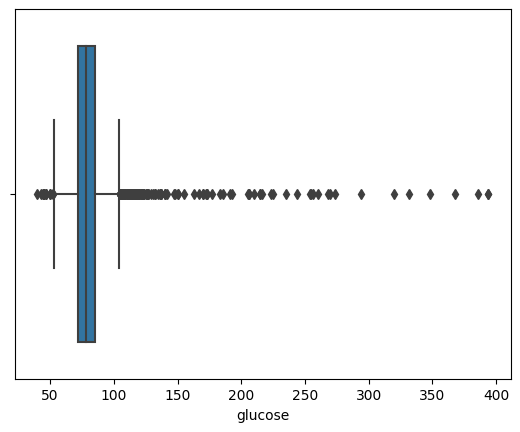

In [27]:
sns.boxplot(data=df,x='glucose')

<Axes: xlabel='cigsPerDay'>

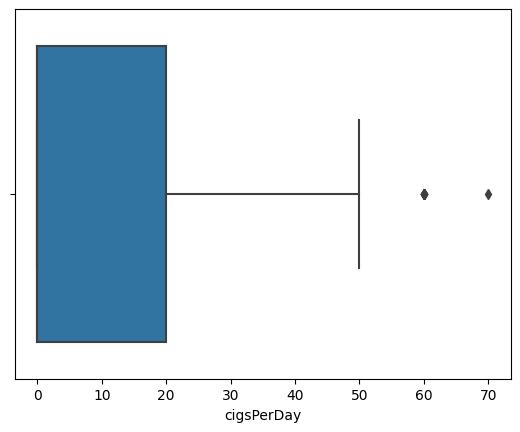

In [28]:
sns.boxplot(data=df,x='cigsPerDay')

<Axes: xlabel='totChol'>

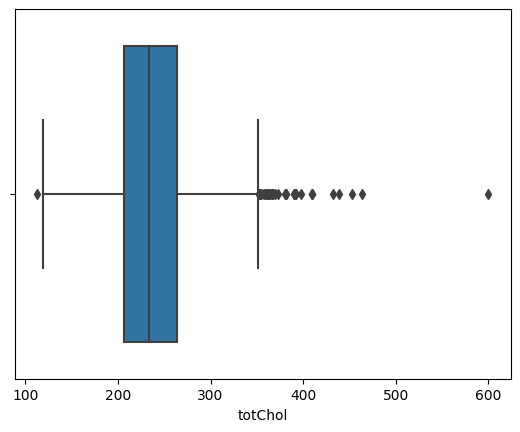

In [29]:
sns.boxplot(data=df,x='totChol')

<Axes: xlabel='heartRate'>

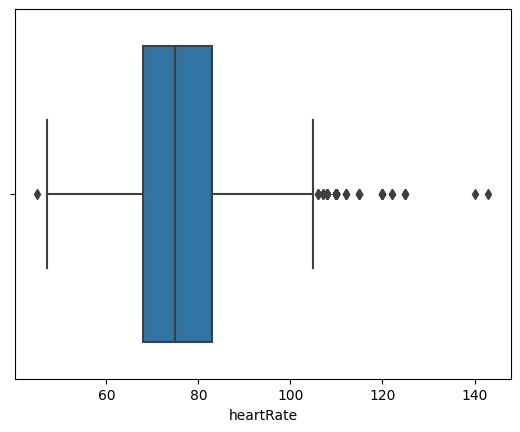

In [30]:
sns.boxplot(data=df,x='heartRate')

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3189 entries, 1 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3189 non-null   int64  
 1   age              3189 non-null   int64  
 2   education        3189 non-null   float64
 3   sex              3189 non-null   int64  
 4   is_smoking       3189 non-null   int64  
 5   cigsPerDay       3189 non-null   float64
 6   BPMeds           3189 non-null   float64
 7   prevalentStroke  3189 non-null   int64  
 8   prevalentHyp     3189 non-null   int64  
 9   diabetes         3189 non-null   int64  
 10  totChol          3189 non-null   float64
 11  sysBP            3189 non-null   float64
 12  diaBP            3189 non-null   float64
 13  BMI              3189 non-null   float64
 14  heartRate        3189 non-null   float64
 15  glucose          3189 non-null   float64
 16  TenYearCHD       3189 non-null   int64  
dtypes: float64(9), int6

In [32]:
df.head()

id  age  education  sex  is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
1   1   36        4.0    1           0         0.0     0.0                0   
2   2   46        1.0    0           1        10.0     0.0                0   
3   3   50        1.0    1           1        20.0     0.0                0   
4   4   64        1.0    0           1        30.0     0.0                0   
5   5   61        3.0    0           0         0.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
1             1         0    212.0  168.0   98.0  29.77       72.0     75.0   
2             0         0    250.0  116.0   71.0  20.35       88.0     94.0   
3             1         0    233.0  158.0   88.0  28.26       68.0     94.0   
4             0         0    241.0  136.5   85.0  26.42       70.0     77.0   
5             1         0    272.0  182.0  121.0  32.80       85.0     65.0   

   TenYearCHD  
1           0  
2           0  
3           1  
4           0  
5           1

In [33]:
x = df.drop('TenYearCHD',axis=1) #  x  indepedent variable we have to drop depedent variable only indepedent variables are here
y = df['TenYearCHD'] # y dependent variables are here

In [34]:
x

id  age  education  sex  is_smoking  cigsPerDay  BPMeds  \
1        1   36        4.0    1           0         0.0     0.0   
2        2   46        1.0    0           1        10.0     0.0   
3        3   50        1.0    1           1        20.0     0.0   
4        4   64        1.0    0           1        30.0     0.0   
5        5   61        3.0    0           0         0.0     0.0   
...    ...  ...        ...  ...         ...         ...     ...   
3384  3384   61        1.0    0           0         0.0     0.0   
3385  3385   60        1.0    0           0         0.0     0.0   
3386  3386   46        1.0    0           0         0.0     0.0   
3387  3387   44        3.0    1           1         3.0     0.0   
3389  3389   54        3.0    0           0         0.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
1                   0             1         0    212.0  168.0   98.0  29.77   
2                   0             0         0    250.0  116.0   71.0  20.35   
3                   0             1         0    233.0  158.0   88.0  28.26   
4                   0             0         0    241.0  136.5   85.0  26.42   
5                   0             1         0    272.0  182.0  121.0  32.80   
...               ...           ...       ...      ...    ...    ...    ...   
3384                0             1         0    217.0  182.0   86.0  26.98   
3385                0             0         0    261.0  123.5   79.0  29.28   
3386                0             0         0    199.0  102.0   56.0  21.96   
3387                0             1         0    352.0  164.0  119.0  28.92   
3389                0             0         0    288.0  124.0   77.0  29.88   

      heartRate  glucose  
1          72.0     75.0  
2          88.0     94.0  
3          68.0     94.0  
4          70.0     77.0  
5          85.0     65.0  
...         ...      ...  
3384      105.0    113.0  
3385       70.0    103.0  
3386       80.0     84.0  
3387       73.0     72.0  
3389       79.0     92.0  

[3189 rows x 16 columns]

In [35]:
y

1       0
2       0
3       1
4       0
5       1
       ..
3384    0
3385    0
3386    0
3387    1
3389    0
Name: TenYearCHD, Length: 3189, dtype: int64

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state=1) 
# random_state = It peaks the value randomly . test data  = 30%

In [37]:
x_train

id  age  education  sex  is_smoking  cigsPerDay  BPMeds  \
1927  1927   49        1.0    1           1        30.0     0.0   
681    681   59        1.0    0           0         0.0     0.0   
1319  1319   53        1.0    1           1        20.0     0.0   
1240  1240   41        2.0    1           1         5.0     0.0   
1823  1823   58        1.0    0           0         0.0     0.0   
...    ...  ...        ...  ...         ...         ...     ...   
2942  2942   42        3.0    0           0         0.0     0.0   
963    963   46        3.0    0           1        25.0     0.0   
1163  1163   43        2.0    0           0         0.0     0.0   
251    251   35        2.0    0           1        20.0     0.0   
1126  1126   37        1.0    1           1        30.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
1927                0             0         0    237.0  114.0   85.5  28.57   
681                 0             0         0    225.0  132.0   80.0  28.41   
1319                0             0         0    220.0  123.5   75.0  19.64   
1240                0             0         0    218.0  129.5   93.0  27.80   
1823                0             0         0    234.0  137.5   89.5  24.25   
...               ...           ...       ...      ...    ...    ...    ...   
2942                0             1         0    230.0  142.5   79.0  25.15   
963                 0             0         0    165.0   99.5   66.0  21.67   
1163                0             0         0    237.0  130.0   80.0  22.71   
251                 0             0         0    231.0  150.0   90.0  23.09   
1126                0             0         0    275.0  127.0   80.0  27.22   

      heartRate  glucose  
1927       88.0     92.0  
681        58.0     88.0  
1319       78.0     73.0  
1240       58.0     83.0  
1823       58.0     72.0  
...         ...      ...  
2942       82.0     99.0  
963        72.0     66.0  
1163       65.0     78.0  
251        83.0     72.0  
1126       85.0     93.0  

[2232 rows x 16 columns]

In [38]:
y_train.value_counts()

TenYearCHD
0    1919
1     313
Name: count, dtype: int64

In [39]:
x_test

id  age  education  sex  is_smoking  cigsPerDay  BPMeds  \
426    426   38        2.0    0           0         0.0     0.0   
478    478   58        2.0    0           0         0.0     0.0   
2701  2701   54        1.0    0           0         0.0     0.0   
16      16   50        1.0    0           0         0.0     0.0   
48      48   55        1.0    0           1        10.0     0.0   
...    ...  ...        ...  ...         ...         ...     ...   
1599  1599   51        2.0    1           1        13.0     0.0   
2066  2066   39        2.0    1           1        20.0     0.0   
437    437   41        4.0    0           0         0.0     0.0   
38      38   41        2.0    0           1         9.0     1.0   
1247  1247   52        3.0    0           1         9.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
426                 0             0         0    215.0  106.5   75.0  23.82   
478                 0             1         0    166.0  185.5  115.5  27.97   
2701                0             0         0    207.0  137.5   89.0  25.43   
16                  0             1         0    240.0  163.0  105.0  31.37   
48                  0             0         0    346.0  131.0   81.0  22.69   
...               ...           ...       ...      ...    ...    ...    ...   
1599                0             0         0    245.0  137.0   76.0  22.26   
2066                0             0         0    310.0  134.0   90.0  35.11   
437                 0             0         0    205.0  110.0   69.0  25.99   
38                  1             1         0    180.0  114.0   70.0  22.41   
1247                0             0         0    249.0  112.0   75.0  22.54   

      heartRate  glucose  
426        60.0     67.0  
478       100.0     85.0  
2701       63.0     72.0  
16         89.0     75.0  
48         75.0     77.0  
...         ...      ...  
1599       83.0     73.0  
2066       69.0     88.0  
437        75.0     67.0  
38         92.0     78.0  
1247       72.0     71.0  

[957 rows x 16 columns]

In [40]:
y_test

426     0
478     0
2701    0
16      0
48      0
       ..
1599    0
2066    0
437     0
38      0
1247    1
Name: TenYearCHD, Length: 957, dtype: int64

## Logistic Regression


In [41]:
log_model = LogisticRegression() # Creating logistic Regression 

In [42]:
log_model.fit(x_train,y_train)   # Fit the model with x_train & y_train

LogisticRegression()

In [43]:
log_model.fit(x_test,y_test)

LogisticRegression()

In [44]:
y_pred = log_model.predict(x_test) # y_prediction
y_pred[:6]

array([0, 0, 0, 0, 0, 0], dtype=int64)

In [45]:
y_test[100:106] # Y actual

1774    0
1787    0
806     0
2099    0
3219    0
2501    0
Name: TenYearCHD, dtype: int64

## Evaluation

In [46]:
## Testing Data Evalution
cnf_matrix = confusion_matrix(y_test,y_pred)
print('confusion matrix :\n',cnf_matrix)

acc_score_LR = accuracy_score(y_test,y_pred)
print("Accuracy Score : ",acc_score_LR)

clf_report = classification_report(y_test , y_pred)
print('classification_report : \n',clf_report)

confusion matrix :
 [[785  10]
 [145  17]]
Accuracy Score :  0.8380355276907001
classification_report : 
               precision    recall  f1-score   support

           0       0.84      0.99      0.91       795
           1       0.63      0.10      0.18       162

    accuracy                           0.84       957
   macro avg       0.74      0.55      0.55       957
weighted avg       0.81      0.84      0.79       957



TP >> 782 - here patient have TenYearCHD and model also gets the report is positive .

TN >> 21 - patient doesn't have TenYearCHD and model also gets the report is negative.

FP >> 13 - patient doesn't have TenYearCHD but the model gets the report is positve.

FN >> 141 - patient have TenYearCHD but model gets the report is negative.

Accuracy is 84%

Precision: 0: Model correctly predicts 85% of patients who actually dont have TenYearCHD. 1: Model correctly predicts 62% of patients who actually have TenYearCHD.

RecallR0): 98% of patients who dont have TenYearCHD are correctly predicte R1): 13% of patients who have TenYearCHD are correctly predicted.



In [47]:
y_pred_prob= log_model.predict_proba(x_test) # for prediction of observationes
y_pred_prob

array([[0.90041992, 0.09958008],
       [0.83910964, 0.16089036],
       [0.8154243 , 0.1845757 ],
       ...,
       [0.89704028, 0.10295972],
       [0.88122162, 0.11877838],
       [0.86316487, 0.13683513]])

In [48]:
fpr , tpr, thresh = roc_curve(y_test, y_pred_prob[:,1])

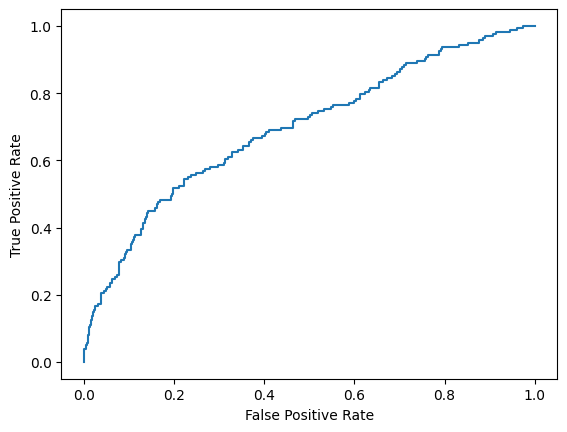

In [49]:
plt.plot(fpr, tpr) #by this graph we can check how does the classifier works correctly
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.savefig('ROC_Curve.png')

## Applying Decision tree algorithm

In [50]:
from sklearn.tree import DecisionTreeClassifier, plot_tree #(this is for plotting tree)
from sklearn.model_selection import train_test_split, GridSearchCV,RandomizedSearchCV

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [51]:
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train,y_train)


DecisionTreeClassifier()

In [52]:
# Testing data evaluation
y_pred = dt_model.predict(x_test)

cnf_matrix = confusion_matrix(y_test,y_pred)
print('confusion matrix :\n',cnf_matrix)

acc_score_DT = accuracy_score(y_test,y_pred)
print("Accuracy Score : ",acc_score_DT)

clf_report = classification_report(y_test , y_pred)
print('classification_report : \n',clf_report)

confusion matrix :
 [[680 115]
 [119  43]]
Accuracy Score :  0.7554858934169278
classification_report : 
               precision    recall  f1-score   support

           0       0.85      0.86      0.85       795
           1       0.27      0.27      0.27       162

    accuracy                           0.76       957
   macro avg       0.56      0.56      0.56       957
weighted avg       0.75      0.76      0.75       957



TP >> 795 - here patient have TenYearCHD and model also gets the report is positive .

TN >> 162 - patient doesn't have TenYearCHD and model also gets the report is negative.

FP >> 0 - patient doesn't have TenYearCHD but the model gets the report is positve.

FN >> 0 - patient have TenYearCHD but model gets the report is negative.

Accuracy is 100%

Precision: 0: Model correctly predicts 100% of patients who actually dont have TenYearCHD. 1: Model correctly predicts 100% of patients who actually have TenYearCHD.

Recall :0: 100% of patients who dont have TenYearCHD are correctly predicted. 1: 100% of patients who have TenYearCHD are correctly predicted.

In [53]:
# Training data evaluation
y_pred_train= dt_model.predict(x_train)

cnf_matrix = confusion_matrix(y_train,y_pred_train)
print('confusion matrix :\n',cnf_matrix)

acc_score_dt = accuracy_score(y_train,y_pred_train)
print("Accuracy Score : ",acc_score_dt)

clf_report = classification_report(y_train,y_pred_train)
print('classification_report : \n',clf_report)

confusion matrix :
 [[1919    0]
 [   0  313]]
Accuracy Score :  1.0
classification_report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1919
           1       1.00      1.00      1.00       313

    accuracy                           1.00      2232
   macro avg       1.00      1.00      1.00      2232
weighted avg       1.00      1.00      1.00      2232



TP >> 1919 - here patient have TenYearCHD and model also gets the report is positive .

TN >> 313 - patient doesn't have TenYearCHD and model also gets the report is negative.

FP >> 0 - patient doesn't have TenYearCHD but the model gets the report is positve.

FN >> 0 - patient have TenYearCHD but model gets the report is negative.

Accuracy is 100%

Precision: 0: Model correctly predicts 100% of patients who actually dont have TenYearCHD. 1: Model correctly predicts 100% of patients who actually have TenYearCHD.

Recall :0: 100% of patients who dont have TenYearCHD are correctly predicted.  1: 100% of patients who have TenYearCHD are correctly predicted.

## Hyperparameter Tunning

In [54]:
dt_model=DecisionTreeClassifier()
hyp = {'criterion':['gini','entropy'],
       'max_depth':np.arange(2,10),
       'min_samples_split':np.arange(2,10),
       'min_samples_leaf':np.arange(2,10)
        }
rscv_model = RandomizedSearchCV(dt_model,hyp,random_state=10,cv=5)
rscv_model.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_leaf': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9])},
                   random_state=10)

In [55]:
rscv_model.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=2, min_samples_leaf=3,
                       min_samples_split=9)

In [56]:
dt_model = DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=2,
                      min_samples_split=7)
dt_model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=2,
                       min_samples_split=7)

In [57]:
# testing data evaluation
y_pred_test = dt_model.predict(x_test)

mse= mean_squared_error(y_test,y_pred)
print('Mean Squared Error :', mse)

rmse= np.sqrt(mse)
print('Root Mean Squared Error :', rmse)

mae= mean_absolute_error(y_test,y_pred)
print('Mean Absolute Error', mae)

r2 = r2_score(y_test,y_pred)
print('R-squared value', r2)

Mean Squared Error : 0.2445141065830721
Root Mean Squared Error : 0.4944836767609949
Mean Absolute Error 0.2445141065830721
R-squared value -0.7387840670859536


In [58]:
# Training data evaluation
y_pred_train = dt_model.predict(x_train)

mse= mean_squared_error(y_train,y_pred_train)
print('Mean Squared Error :', mse)

rmse= np.sqrt(mse)
print('Root Mean Squared Error :', rmse)

mae= mean_absolute_error(y_train,y_pred_train)
print('Mean Absolute Error', mae)

r2 = r2_score(y_train,y_pred_train)
print('R-squared value', r2)

Mean Squared Error : 0.11648745519713262
Root Mean Squared Error : 0.34130258598072855
Mean Absolute Error 0.11648745519713262
R-squared value 0.03384184054860839


In [59]:
plt.figure(figsize=(200,200))# used matplotlib library here
tree = plot_tree(dt_model, feature_names=x.columns, filled=True)
plt.savefig('Decision_Tree_reg.png')

## KNN

In [60]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler# for scaling techunque

# we use classifiction model we choose either a classsifier or regression
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [61]:
# before we apply knn we have to do a scaling techinque in knn.

## Feature Scalling
## Normalization - Scaling Technique

In [62]:
Norm = MinMaxScaler()
#Norm.fit(x)
Norm_array = Norm.fit_transform(x)
df_new = pd.DataFrame(Norm_array,columns=x.columns)
df_new

id       age  education  sex  is_smoking  cigsPerDay  BPMeds  \
0     0.000000  0.105263   1.000000  1.0         0.0    0.000000     0.0   
1     0.000295  0.368421   0.000000  0.0         1.0    0.142857     0.0   
2     0.000590  0.473684   0.000000  1.0         1.0    0.285714     0.0   
3     0.000885  0.842105   0.000000  0.0         1.0    0.428571     0.0   
4     0.001181  0.763158   0.666667  0.0         0.0    0.000000     0.0   
...        ...       ...        ...  ...         ...         ...     ...   
3184  0.998524  0.763158   0.000000  0.0         0.0    0.000000     0.0   
3185  0.998819  0.736842   0.000000  0.0         0.0    0.000000     0.0   
3186  0.999115  0.368421   0.000000  0.0         0.0    0.000000     0.0   
3187  0.999410  0.315789   0.666667  1.0         1.0    0.042857     0.0   
3188  1.000000  0.578947   0.666667  0.0         0.0    0.000000     0.0   

      prevalentStroke  prevalentHyp  diabetes   totChol     sysBP     diaBP  \
0                 0.0           1.0       0.0  0.203285  0.399527  0.529101   
1                 0.0           0.0       0.0  0.281314  0.153664  0.243386   
2                 0.0           1.0       0.0  0.246407  0.352246  0.423280   
3                 0.0           0.0       0.0  0.262834  0.250591  0.391534   
4                 0.0           1.0       0.0  0.326489  0.465721  0.772487   
...               ...           ...       ...       ...       ...       ...   
3184              0.0           1.0       0.0  0.213552  0.465721  0.402116   
3185              0.0           0.0       0.0  0.303901  0.189125  0.328042   
3186              0.0           0.0       0.0  0.176591  0.087470  0.084656   
3187              0.0           1.0       0.0  0.490760  0.380615  0.751323   
3188              0.0           0.0       0.0  0.359343  0.191489  0.306878   

           BMI  heartRate   glucose  
0     0.338149   0.275510  0.098870  
1     0.107493   0.438776  0.152542  
2     0.301175   0.234694  0.152542  
3     0.256121   0.255102  0.104520  
4     0.412341   0.408163  0.070621  
...        ...        ...       ...  
3184  0.269833   0.612245  0.206215  
3185  0.326151   0.255102  0.177966  
3186  0.146915   0.357143  0.124294  
3187  0.317336   0.285714  0.090395  
3188  0.340842   0.346939  0.146893  

[3189 rows x 16 columns]

## Standerdization

In [63]:
std = StandardScaler()
std.fit(x)
std_array = std.transform(x)
df_std = pd.DataFrame(std_array, columns=x.columns)
df_std

id       age  education       sex  is_smoking  cigsPerDay  \
0    -1.728521 -1.569155   1.990897  1.135475   -0.990326   -0.766951   
1    -1.727502 -0.400234  -0.955261 -0.880689    1.009769    0.076024   
2    -1.726482  0.067335  -0.955261  1.135475    1.009769    0.918998   
3    -1.725462  1.703825  -0.955261 -0.880689    1.009769    1.761972   
4    -1.724443  1.353149   1.008844 -0.880689   -0.990326   -0.766951   
...        ...       ...        ...       ...         ...         ...   
3184  1.720897  1.353149  -0.955261 -0.880689   -0.990326   -0.766951   
3185  1.721916  1.236256  -0.955261 -0.880689   -0.990326   -0.766951   
3186  1.722936 -0.400234  -0.955261 -0.880689   -0.990326   -0.766951   
3187  1.723955 -0.634018   1.008844  1.135475    1.009769   -0.514058   
3188  1.725995  0.534904   1.008844 -0.880689   -0.990326   -0.766951   

        BPMeds  prevalentStroke  prevalentHyp  diabetes   totChol     sysBP  \
0    -0.174274        -0.077419      1.480605 -0.161437 -0.560702  1.603890   
1    -0.174274        -0.077419     -0.675399 -0.161437  0.292636 -0.741265   
2    -0.174274        -0.077419      1.480605 -0.161437 -0.089121  1.152899   
3    -0.174274        -0.077419     -0.675399 -0.161437  0.090529  0.183267   
4    -0.174274        -0.077419      1.480605 -0.161437  0.786673  2.235278   
...        ...              ...           ...       ...       ...       ...   
3184 -0.174274        -0.077419      1.480605 -0.161437 -0.448421  2.235278   
3185 -0.174274        -0.077419     -0.675399 -0.161437  0.539654 -0.403021   
3186 -0.174274        -0.077419     -0.675399 -0.161437 -0.852634 -1.372653   
3187 -0.174274        -0.077419      1.480605 -0.161437  2.583174  1.423494   
3188 -0.174274        -0.077419     -0.675399 -0.161437  1.145973 -0.380472   

         diaBP       BMI  heartRate   glucose  
0     1.264103  0.966902  -0.334651 -0.285990  
1    -0.987442 -1.312756   0.992611  0.535925  
2     0.430197  0.601479  -0.666466  0.535925  
3     0.180026  0.156196  -0.500558 -0.199473  
4     3.182085  1.700167   0.743749 -0.718577  
...        ...       ...        ...       ...  
3184  0.263416  0.291717   2.402826  1.357839  
3185 -0.320317  0.848321  -0.500558  0.925253  
3186 -2.238300 -0.923133   0.328980  0.103338  
3187  3.015304  0.761200  -0.251697 -0.415766  
3188 -0.487098  0.993522   0.246026  0.449407  

[3189 rows x 16 columns]

In [64]:
# we have a proper data then spitting the data.

## Splitting the Data

In [65]:
x_train, x_test, y_train, y_test = train_test_split(df_new, y, test_size=0.3, random_state=1) # df_new = split wala dataframe

## Model Training

In [66]:
Knn_model = KNeighborsClassifier()# knn_model = instance created
Knn_model.fit(x_train,y_train)

KNeighborsClassifier()

In [67]:
## Testing Data Evualation
y_pred = Knn_model.predict(x_test)
cf_matrix = confusion_matrix(y_test, y_pred)
print('\nConfusion Matrix is:\n', cf_matrix)

acc_score_KN= accuracy_score(y_test, y_pred)
print('\nAccuracy is:',acc_score_KN)

clf_Report = classification_report(y_test, y_pred)
print('\nClassification Report is:\n',clf_Report)


Confusion Matrix is:
 [[774  21]
 [154   8]]

Accuracy is: 0.8171368861024033

Classification Report is:
               precision    recall  f1-score   support

           0       0.83      0.97      0.90       795
           1       0.28      0.05      0.08       162

    accuracy                           0.82       957
   macro avg       0.55      0.51      0.49       957
weighted avg       0.74      0.82      0.76       957



TP >> 795 - here patient have TenYearCHD and model also gets the report is positive .

TN >> 162 - patient doesn't have TenYearCHD and model also gets the report is negative.

FP >> 0 - patient doesn't have TenYearCHD but the model gets the report is positve.

FN >> 0 - patient have TenYearCHD but model gets the report is negative.

Accuracy is 100%

Precision: 0: Model correctly predicts 100% of patients who actually dont have TenYearCHD. 1: Model correctly predicts 100% of patients who actually have TenYearCHD.

Recall :0: 100% of patients who dont have TenYearCHD are correctly predicted. 1: 100% of patients who have TenYearCHD are correctly predicted.

In [68]:
## Training Data Evaluation
y_pred_train = Knn_model.predict(x_train)
cf_matrix = confusion_matrix(y_train,y_pred_train)
print('\nConfusion Matrix is:\n', cf_matrix)

acc_score_knn= accuracy_score(y_train,y_pred_train)
print('\nAccuracy is:',acc_score_knn)

clf_Report = classification_report(y_train,y_pred_train)
print('\nClassification Report is:\n',clf_Report)


Confusion Matrix is:
 [[1897   22]
 [ 268   45]]

Accuracy is: 0.8700716845878136

Classification Report is:
               precision    recall  f1-score   support

           0       0.88      0.99      0.93      1919
           1       0.67      0.14      0.24       313

    accuracy                           0.87      2232
   macro avg       0.77      0.57      0.58      2232
weighted avg       0.85      0.87      0.83      2232



TP >> 1919 - here patient have TenYearCHD and model also gets the report is positive .

TN >> 313- patient doesn't have TenYearCHD and model also gets the report is negative.

FP >> 0 - patient doesn't have TenYearCHD but the model gets the report is positve.

FN >> 0 - patient have TenYearCHD but model gets the report is negative.

Accuracy is 100%

Precision: 0: Model correctly predicts 100% of patients who actually dont have TenYearCHD. 1: Model correctly predicts 100% of patients who actually have TenYearCHD.

Recall :0: 100% of patients who dont have TenYearCHD are correctly predicted.  1: 100% of patients who have TenYearCHD are correctly predicted.

### Hyperparameter Tunning

In [69]:
knn_model = KNeighborsClassifier()
hyp = {'p':[1,2],  # p - parameter(distance metric) 1 = manhaton distance, 2 = Euclodean distance
       'n_neighbors' : np.arange(3,30)} 
gscv_knn_model = GridSearchCV(knn_model, hyp, cv=5) # cv= cross validation
gscv_knn_model.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
                         'p': [1, 2]})

In [70]:
gscv_knn_model.best_params_     

{'n_neighbors': 18, 'p': 2}

In [71]:
y_pred_new = gscv_knn_model.predict(x_test)

acc_score_KNN= accuracy_score(y_test,y_pred_new)
print('Accuracy:', acc_score_KNN) # testing wla accuracy

Accuracy: 0.8307210031347962


# Random Forest

In [72]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV,RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [73]:
# Model Training with DT
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train,y_train)
# dt_model.cost_complexity_prunning_path(x_train,y_train)

DecisionTreeClassifier()

In [74]:
y_pred = dt_model.predict(x_test)


In [75]:
dt_acc = accuracy_score(y_test, y_pred)
print('Accuracy for DT is :', dt_acc)

Accuracy for DT is : 0.7502612330198537


In [76]:
# Model Training with RF
rf_model = RandomForestClassifier()
rf_model.fit(x_train,y_train)

RandomForestClassifier()

In [77]:
y_pred_rf = rf_model.predict(x_test)

In [78]:
rf_acc = accuracy_score(y_test, y_pred_rf)
print('Accuracy for RF is :', rf_acc)

Accuracy for RF is : 0.8380355276907001


In [79]:
rf_model = RandomForestClassifier()

hyp = {'criterion': ['gini','entropy'],
       'n_estimators': np.arange(10,200,10),
       'max_depth': np.arange(2,10),
       'min_samples_split': np.arange(2,20),
       'min_samples_leaf': np.arange(2,10)}

rscv_rf_clf = RandomizedSearchCV(rf_model, hyp, cv=7)
rscv_rf_clf.fit(x_train,y_train)

RandomizedSearchCV(cv=7, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_leaf': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19]),
                                        'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190])})

In [80]:
rscv_rf_clf.best_estimator_

RandomForestClassifier(max_depth=4, min_samples_leaf=4, min_samples_split=15,
                       n_estimators=10)

In [81]:
rf_model = RandomForestClassifier(max_depth=8, 
                                  min_samples_leaf=2,
                                  min_samples_split=8, 
                                  n_estimators=80,
                                  max_features='sqrt',
                                  oob_score = True) # log2(no. of features)
rf_model.fit(x_train,y_train)

RandomForestClassifier(max_depth=8, min_samples_leaf=2, min_samples_split=8,
                       n_estimators=80, oob_score=True)

In [82]:
# Train data Accuracy
y_pred_train = rf_model.predict(x_train)

cnf_matrix = confusion_matrix(y_train,y_pred_train)
print('\nConfusion MAtrix: ',cnf_matrix)

acc_score_rf = accuracy_score(y_train,y_pred_train)
print('\nAccuracy score is', acc_score_rf)


Confusion MAtrix:  [[1919    0]
 [ 263   50]]

Accuracy score is 0.882168458781362


In [83]:
# Test data Accuracy
y_pred = rf_model.predict(x_test)

cnf_matrix = confusion_matrix(y_test,y_pred)
print('\nConfusion MAtrix:\n ',cnf_matrix)

acc_score_RF = accuracy_score(y_test,y_pred)
print('\nAccuracy score is\n', acc_score_RF)


Confusion MAtrix:
  [[793   2]
 [154   8]]

Accuracy score is
 0.8369905956112853


In [84]:
rf_model.oob_score_

0.8588709677419355

In [85]:
print('acc_score_LR :',acc_score_LR,'acc_score_KNN :',acc_score_KNN,'acc_score_DT :',acc_score_DT,'acc_score_RF :',acc_score_RF)

acc_score_LR : 0.8380355276907001 acc_score_KNN : 0.8307210031347962 acc_score_DT : 0.7554858934169278 acc_score_RF : 0.8369905956112853


## Converting the Imbalance data to Balance data 

In [192]:
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification

# Generate imbalanced data (replace this with your actual data)
x, y = make_classification(n_classes=2, class_sep=2,
                           weights=[0.1, 0.9], n_informative=3, n_redundant=1,
                           flip_y=0, n_features=17, n_clusters_per_class=1,
                           n_samples=1000, random_state=42)

# Apply SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
x_resampled, y_resampled = smote.fit_resample(x,y)

In [193]:
y_df = pd.DataFrame(y_resampled)

In [194]:
y_df[0].value_counts()

0
1    900
0    900
Name: count, dtype: int64

## Logistic 

In [197]:
log_model = LogisticRegression() # Creating logistic Regression 


In [198]:
x_resampled = df.drop('TenYearCHD',axis=1) #  x  indepedent variable we have to drop depedent variable only indepedent variables are here
y_resampled = df['TenYearCHD'] # y dependent variables are here

In [199]:
x_resampled

id  age  education  sex  is_smoking  cigsPerDay  BPMeds  \
1        1   36        4.0    1           0         0.0     0.0   
2        2   46        1.0    0           1        10.0     0.0   
3        3   50        1.0    1           1        20.0     0.0   
4        4   64        1.0    0           1        30.0     0.0   
5        5   61        3.0    0           0         0.0     0.0   
...    ...  ...        ...  ...         ...         ...     ...   
3384  3384   61        1.0    0           0         0.0     0.0   
3385  3385   60        1.0    0           0         0.0     0.0   
3386  3386   46        1.0    0           0         0.0     0.0   
3387  3387   44        3.0    1           1         3.0     0.0   
3389  3389   54        3.0    0           0         0.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
1                   0             1         0    212.0  168.0   98.0  29.77   
2                   0             0         0    250.0  116.0   71.0  20.35   
3                   0             1         0    233.0  158.0   88.0  28.26   
4                   0             0         0    241.0  136.5   85.0  26.42   
5                   0             1         0    272.0  182.0  121.0  32.80   
...               ...           ...       ...      ...    ...    ...    ...   
3384                0             1         0    217.0  182.0   86.0  26.98   
3385                0             0         0    261.0  123.5   79.0  29.28   
3386                0             0         0    199.0  102.0   56.0  21.96   
3387                0             1         0    352.0  164.0  119.0  28.92   
3389                0             0         0    288.0  124.0   77.0  29.88   

      heartRate  glucose  
1          72.0     75.0  
2          88.0     94.0  
3          68.0     94.0  
4          70.0     77.0  
5          85.0     65.0  
...         ...      ...  
3384      105.0    113.0  
3385       70.0    103.0  
3386       80.0     84.0  
3387       73.0     72.0  
3389       79.0     92.0  

[3189 rows x 16 columns]

In [200]:
y_resampled

1       0
2       0
3       1
4       0
5       1
       ..
3384    0
3385    0
3386    0
3387    1
3389    0
Name: TenYearCHD, Length: 3189, dtype: int64

In [201]:
x_resampled_train, x_resampled_test, y_resampled_train, y_resampled_test = train_test_split(x_resampled,y_resampled, test_size = 0.3, random_state=1) 
# random_state = It peaks the value randomly . test data  = 30%

In [202]:
x_resampled_train

id  age  education  sex  is_smoking  cigsPerDay  BPMeds  \
1927  1927   49        1.0    1           1        30.0     0.0   
681    681   59        1.0    0           0         0.0     0.0   
1319  1319   53        1.0    1           1        20.0     0.0   
1240  1240   41        2.0    1           1         5.0     0.0   
1823  1823   58        1.0    0           0         0.0     0.0   
...    ...  ...        ...  ...         ...         ...     ...   
2942  2942   42        3.0    0           0         0.0     0.0   
963    963   46        3.0    0           1        25.0     0.0   
1163  1163   43        2.0    0           0         0.0     0.0   
251    251   35        2.0    0           1        20.0     0.0   
1126  1126   37        1.0    1           1        30.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
1927                0             0         0    237.0  114.0   85.5  28.57   
681                 0             0         0    225.0  132.0   80.0  28.41   
1319                0             0         0    220.0  123.5   75.0  19.64   
1240                0             0         0    218.0  129.5   93.0  27.80   
1823                0             0         0    234.0  137.5   89.5  24.25   
...               ...           ...       ...      ...    ...    ...    ...   
2942                0             1         0    230.0  142.5   79.0  25.15   
963                 0             0         0    165.0   99.5   66.0  21.67   
1163                0             0         0    237.0  130.0   80.0  22.71   
251                 0             0         0    231.0  150.0   90.0  23.09   
1126                0             0         0    275.0  127.0   80.0  27.22   

      heartRate  glucose  
1927       88.0     92.0  
681        58.0     88.0  
1319       78.0     73.0  
1240       58.0     83.0  
1823       58.0     72.0  
...         ...      ...  
2942       82.0     99.0  
963        72.0     66.0  
1163       65.0     78.0  
251        83.0     72.0  
1126       85.0     93.0  

[2232 rows x 16 columns]

In [203]:
y_resampled_train

1927    0
681     0
1319    0
1240    0
1823    0
       ..
2942    0
963     0
1163    0
251     0
1126    0
Name: TenYearCHD, Length: 2232, dtype: int64

In [204]:
log_model.fit(x_resampled_train,y_resampled_train)   # Fit the model with x_train & y_train

LogisticRegression()

In [205]:
log_model.fit(x_resampled_test,y_resampled_test)

LogisticRegression()

In [206]:
y_pred = log_model.predict(x_resampled_test) # y_prediction
y_pred[:6]

array([0, 0, 0, 0, 0, 0], dtype=int64)

In [207]:
y_resampled_test[100:106] # Y actual

1774    0
1787    0
806     0
2099    0
3219    0
2501    0
Name: TenYearCHD, dtype: int64

In [208]:
## Testing Data Evalution
cnf_matrix = confusion_matrix(y_resampled_test,y_pred)
print('confusion matrix :\n',cnf_matrix)

acc_score_LR = accuracy_score(y_resampled_test,y_pred)
print("Accuracy Score : ",acc_score_LR)

clf_report = classification_report(y_resampled_test , y_pred)
print('classification_report : \n',clf_report)

confusion matrix :
 [[785  10]
 [145  17]]
Accuracy Score :  0.8380355276907001
classification_report : 
               precision    recall  f1-score   support

           0       0.84      0.99      0.91       795
           1       0.63      0.10      0.18       162

    accuracy                           0.84       957
   macro avg       0.74      0.55      0.55       957
weighted avg       0.81      0.84      0.79       957



In [209]:
Report = classification_report(y_resampled_test,y_pred)
print(Report)

              precision    recall  f1-score   support

           0       0.84      0.99      0.91       795
           1       0.63      0.10      0.18       162

    accuracy                           0.84       957
   macro avg       0.74      0.55      0.55       957
weighted avg       0.81      0.84      0.79       957



In [210]:
Report = classification_report(y_resampled_test,y_pred)
print(Report)

              precision    recall  f1-score   support

           0       0.84      0.99      0.91       795
           1       0.63      0.10      0.18       162

    accuracy                           0.84       957
   macro avg       0.74      0.55      0.55       957
weighted avg       0.81      0.84      0.79       957



In [211]:
y_pred_prob= log_model.predict_proba(x_resampled_test) # for prediction of observationes
y_pred_prob

array([[0.90041992, 0.09958008],
       [0.83910964, 0.16089036],
       [0.8154243 , 0.1845757 ],
       ...,
       [0.89704028, 0.10295972],
       [0.88122162, 0.11877838],
       [0.86316487, 0.13683513]])

In [212]:
fpr , tpr, thresh = roc_curve(y_resampled_test, y_pred_prob[:,1])

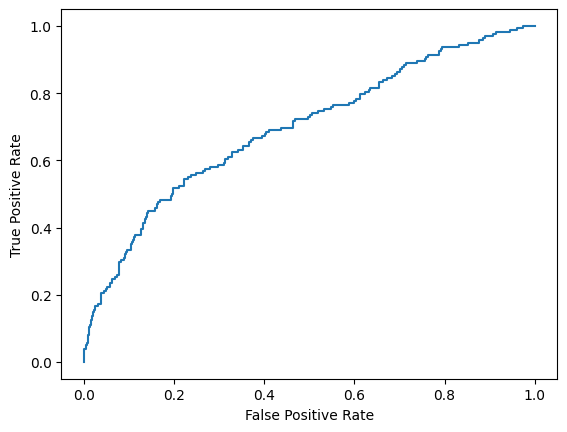

In [213]:
plt.plot(fpr, tpr) #by this graph we can check how does the classifier works correctly
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.savefig('ROC_Curve.png')

## Decision tree algorithm

In [214]:
from sklearn.tree import DecisionTreeClassifier, plot_tree #(this is for plotting tree)
from sklearn.model_selection import train_test_split, GridSearchCV



In [215]:
dt_model = DecisionTreeClassifier()
dt_model.fit(x_resampled_train,y_resampled_train)


DecisionTreeClassifier()

In [216]:
# Testing data evaluation
y_pred = dt_model.predict(x_resampled_test)

cnf_matrix = confusion_matrix(y_resampled_test,y_pred)
print('confusion matrix :\n',cnf_matrix)

acc_score_DT = accuracy_score(y_resampled_test,y_pred)
print("Accuracy Score : ",acc_score_DT)

clf_report = classification_report(y_resampled_test,y_pred)
print('classification_report : \n',clf_report)

confusion matrix :
 [[690 105]
 [125  37]]
Accuracy Score :  0.7596656217345873
classification_report : 
               precision    recall  f1-score   support

           0       0.85      0.87      0.86       795
           1       0.26      0.23      0.24       162

    accuracy                           0.76       957
   macro avg       0.55      0.55      0.55       957
weighted avg       0.75      0.76      0.75       957



In [217]:
# Training data evaluation
y_pred_train= dt_model.predict(x_resampled_train)

cnf_matrix = confusion_matrix(y_resampled_train,y_pred_train)
print('confusion matrix :\n',cnf_matrix)

acc_score_dt = accuracy_score(y_resampled_train,y_pred_train)
print("Accuracy Score : ",acc_score_dt)

clf_report = classification_report(y_resampled_train,y_pred_train)
print('classification_report : \n',clf_report)

confusion matrix :
 [[1919    0]
 [   0  313]]
Accuracy Score :  1.0
classification_report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1919
           1       1.00      1.00      1.00       313

    accuracy                           1.00      2232
   macro avg       1.00      1.00      1.00      2232
weighted avg       1.00      1.00      1.00      2232



In [218]:
dt_model=DecisionTreeClassifier()
hyp = {'criterion':['gini','entropy'],
       'max_depth':np.arange(2,10),
       'min_samples_split':np.arange(2,10),
       'min_samples_leaf':np.arange(2,10)
        
      
      }
rscv_model = RandomizedSearchCV(dt_model,hyp,random_state=10,cv=5)
rscv_model.fit(x_resampled_train,y_resampled_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_leaf': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9])},
                   random_state=10)

In [219]:
rscv_model.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=2, min_samples_leaf=3,
                       min_samples_split=9)

In [220]:
dt_model = DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=2,
                      min_samples_split=7)
dt_model.fit(x_resampled_train,y_resampled_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=2,
                       min_samples_split=7)

## KNN

In [221]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler# for scaling techunque

# we use classifiction model we choose either a classsifier or regression
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## Feature Engineering
## Normalization - scaling techinque

In [222]:
Norm = MinMaxScaler()
#Norm.fit(x)
Norm_array = Norm.fit_transform(x_resampled)
df_new = pd.DataFrame(Norm_array,columns=x_resampled.columns)
df_new

id       age  education  sex  is_smoking  cigsPerDay  BPMeds  \
0     0.000000  0.105263   1.000000  1.0         0.0    0.000000     0.0   
1     0.000295  0.368421   0.000000  0.0         1.0    0.142857     0.0   
2     0.000590  0.473684   0.000000  1.0         1.0    0.285714     0.0   
3     0.000885  0.842105   0.000000  0.0         1.0    0.428571     0.0   
4     0.001181  0.763158   0.666667  0.0         0.0    0.000000     0.0   
...        ...       ...        ...  ...         ...         ...     ...   
3184  0.998524  0.763158   0.000000  0.0         0.0    0.000000     0.0   
3185  0.998819  0.736842   0.000000  0.0         0.0    0.000000     0.0   
3186  0.999115  0.368421   0.000000  0.0         0.0    0.000000     0.0   
3187  0.999410  0.315789   0.666667  1.0         1.0    0.042857     0.0   
3188  1.000000  0.578947   0.666667  0.0         0.0    0.000000     0.0   

      prevalentStroke  prevalentHyp  diabetes   totChol     sysBP     diaBP  \
0                 0.0           1.0       0.0  0.203285  0.399527  0.529101   
1                 0.0           0.0       0.0  0.281314  0.153664  0.243386   
2                 0.0           1.0       0.0  0.246407  0.352246  0.423280   
3                 0.0           0.0       0.0  0.262834  0.250591  0.391534   
4                 0.0           1.0       0.0  0.326489  0.465721  0.772487   
...               ...           ...       ...       ...       ...       ...   
3184              0.0           1.0       0.0  0.213552  0.465721  0.402116   
3185              0.0           0.0       0.0  0.303901  0.189125  0.328042   
3186              0.0           0.0       0.0  0.176591  0.087470  0.084656   
3187              0.0           1.0       0.0  0.490760  0.380615  0.751323   
3188              0.0           0.0       0.0  0.359343  0.191489  0.306878   

           BMI  heartRate   glucose  
0     0.338149   0.275510  0.098870  
1     0.107493   0.438776  0.152542  
2     0.301175   0.234694  0.152542  
3     0.256121   0.255102  0.104520  
4     0.412341   0.408163  0.070621  
...        ...        ...       ...  
3184  0.269833   0.612245  0.206215  
3185  0.326151   0.255102  0.177966  
3186  0.146915   0.357143  0.124294  
3187  0.317336   0.285714  0.090395  
3188  0.340842   0.346939  0.146893  

[3189 rows x 16 columns]

## Standardization

In [223]:
std = StandardScaler()
std.fit(x_resampled)
std_array = std.transform(x_resampled)
df_std = pd.DataFrame(std_array, columns=x_resampled.columns)
df_std

id       age  education       sex  is_smoking  cigsPerDay  \
0    -1.728521 -1.569155   1.990897  1.135475   -0.990326   -0.766951   
1    -1.727502 -0.400234  -0.955261 -0.880689    1.009769    0.076024   
2    -1.726482  0.067335  -0.955261  1.135475    1.009769    0.918998   
3    -1.725462  1.703825  -0.955261 -0.880689    1.009769    1.761972   
4    -1.724443  1.353149   1.008844 -0.880689   -0.990326   -0.766951   
...        ...       ...        ...       ...         ...         ...   
3184  1.720897  1.353149  -0.955261 -0.880689   -0.990326   -0.766951   
3185  1.721916  1.236256  -0.955261 -0.880689   -0.990326   -0.766951   
3186  1.722936 -0.400234  -0.955261 -0.880689   -0.990326   -0.766951   
3187  1.723955 -0.634018   1.008844  1.135475    1.009769   -0.514058   
3188  1.725995  0.534904   1.008844 -0.880689   -0.990326   -0.766951   

        BPMeds  prevalentStroke  prevalentHyp  diabetes   totChol     sysBP  \
0    -0.174274        -0.077419      1.480605 -0.161437 -0.560702  1.603890   
1    -0.174274        -0.077419     -0.675399 -0.161437  0.292636 -0.741265   
2    -0.174274        -0.077419      1.480605 -0.161437 -0.089121  1.152899   
3    -0.174274        -0.077419     -0.675399 -0.161437  0.090529  0.183267   
4    -0.174274        -0.077419      1.480605 -0.161437  0.786673  2.235278   
...        ...              ...           ...       ...       ...       ...   
3184 -0.174274        -0.077419      1.480605 -0.161437 -0.448421  2.235278   
3185 -0.174274        -0.077419     -0.675399 -0.161437  0.539654 -0.403021   
3186 -0.174274        -0.077419     -0.675399 -0.161437 -0.852634 -1.372653   
3187 -0.174274        -0.077419      1.480605 -0.161437  2.583174  1.423494   
3188 -0.174274        -0.077419     -0.675399 -0.161437  1.145973 -0.380472   

         diaBP       BMI  heartRate   glucose  
0     1.264103  0.966902  -0.334651 -0.285990  
1    -0.987442 -1.312756   0.992611  0.535925  
2     0.430197  0.601479  -0.666466  0.535925  
3     0.180026  0.156196  -0.500558 -0.199473  
4     3.182085  1.700167   0.743749 -0.718577  
...        ...       ...        ...       ...  
3184  0.263416  0.291717   2.402826  1.357839  
3185 -0.320317  0.848321  -0.500558  0.925253  
3186 -2.238300 -0.923133   0.328980  0.103338  
3187  3.015304  0.761200  -0.251697 -0.415766  
3188 -0.487098  0.993522   0.246026  0.449407  

[3189 rows x 16 columns]

## Splitting the data

In [225]:
x_resampled_train, x_resampled_test, y_resampled_train, y_resampled_test = train_test_split(df_new, y_resampled, test_size=0.3, random_state=1) # df_new = split wala dataframe

## Model Train

In [226]:
Knn_model = KNeighborsClassifier()# knn_model = instance created
Knn_model.fit(x_resampled_train,y_resampled_train)

KNeighborsClassifier()

In [227]:
## Testing Data Evualation
y_pred = Knn_model.predict(x_resampled_test)
cf_matrix = confusion_matrix(y_resampled_test, y_pred)
print('\nConfusion Matrix isre:\n', cf_matrix)

acc_score_KN= accuracy_score(y_resampled_test, y_pred)
print('\nAccuracy is:',acc_score_KN)

clf_Report = classification_report(y_resampled_test, y_pred)
print('\nClassification Report is:\n',clf_Report)


Confusion Matrix isre:
 [[774  21]
 [154   8]]

Accuracy is: 0.8171368861024033

Classification Report is:
               precision    recall  f1-score   support

           0       0.83      0.97      0.90       795
           1       0.28      0.05      0.08       162

    accuracy                           0.82       957
   macro avg       0.55      0.51      0.49       957
weighted avg       0.74      0.82      0.76       957



In [228]:
## Training Data Evaluation
y_pred_train = Knn_model.predict(x_resampled_train)
cf_matrix = confusion_matrix(y_resampled_train,y_pred_train)
print('\nConfusion Matrix is:\n', cf_matrix)

acc_score_knn= accuracy_score(y_resampled_train,y_pred_train)
print('\nAccuracy is:',acc_score_knn)

clf_Report = classification_report(y_resampled_train,y_pred_train)
print('\nClassification Report is:\n',clf_Report)


Confusion Matrix is:
 [[1897   22]
 [ 268   45]]

Accuracy is: 0.8700716845878136

Classification Report is:
               precision    recall  f1-score   support

           0       0.88      0.99      0.93      1919
           1       0.67      0.14      0.24       313

    accuracy                           0.87      2232
   macro avg       0.77      0.57      0.58      2232
weighted avg       0.85      0.87      0.83      2232



## Hyperparameter Tunning

In [229]:
knn_model = KNeighborsClassifier()
hyp = {'p':[1,2],  # p - parameter(distance metric) 1 = manhaton distance, 2 = Euclodean distance
       'n_neighbors' : np.arange(3,30)} 
gscv_knn_model = GridSearchCV(knn_model, hyp, cv=5) # cv= cross validation
gscv_knn_model.fit(x_resampled_train,y_resampled_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
                         'p': [1, 2]})

In [230]:
gscv_knn_model.best_params_     

{'n_neighbors': 18, 'p': 2}

In [231]:
y_pred_new = gscv_knn_model.predict(x_test)

acc_score_KNN= accuracy_score(y_resampled_test,y_pred_new)
print('Accuracy:', acc_score_KNN) # testing wla accuracy

Accuracy: 0.8307210031347962


In [232]:
## Random Forest

In [233]:
# Model Training with DT
dt_model = DecisionTreeClassifier()
dt_model.fit(x_resampled_train,y_resampled_train)
# dt_model.cost_complexity_prunning_path(x_train,y_train)

DecisionTreeClassifier()

In [234]:
y_pred = dt_model.predict(x_resampled_test)

In [235]:
dt_acc = accuracy_score(y_resampled_test, y_pred)
print('Accuracy for DT is :', dt_acc)

Accuracy for DT is : 0.7492163009404389


In [236]:
# Model Training with RF
rf_model = RandomForestClassifier()
rf_model.fit(x_resampled_train,y_resampled_train)

RandomForestClassifier()

In [237]:
y_pred_rf = rf_model.predict(x_resampled_test)

In [238]:
rf_acc = accuracy_score(y_resampled_test, y_pred_rf)
print('Accuracy for RF is :', rf_acc)

Accuracy for RF is : 0.8349007314524556


In [239]:
rf_model = RandomForestClassifier()

hyp = {'criterion': ['gini','entropy'],
       'n_estimators': np.arange(10,200,10),
       'max_depth': np.arange(2,10),
       'min_samples_split': np.arange(2,20),
       'min_samples_leaf': np.arange(2,10)}

rscv_rf_clf = RandomizedSearchCV(rf_model, hyp, cv=7)
rscv_rf_clf.fit(x_resampled_train,y_resampled_train)

RandomizedSearchCV(cv=7, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_leaf': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19]),
                                        'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190])})

In [240]:
rscv_rf_clf.best_estimator_

RandomForestClassifier(max_depth=3, min_samples_leaf=5, min_samples_split=14,
                       n_estimators=20)

In [241]:
rf_model = RandomForestClassifier(max_depth=8, 
                                  min_samples_leaf=2,
                                  min_samples_split=8, 
                                  n_estimators=80,
                                  max_features='sqrt',
                                  oob_score = True) # log2(no. of features)
rf_model.fit(x_resampled_train,y_resampled_train)

RandomForestClassifier(max_depth=8, min_samples_leaf=2, min_samples_split=8,
                       n_estimators=80, oob_score=True)

In [242]:
# Train data Accuracy
y_pred_train = rf_model.predict(x_resampled_train)

cnf_matrix = confusion_matrix(y_resampled_train,y_pred_train)
print('\nConfusion MAtrix: ',cnf_matrix)

acc_score_rf = accuracy_score(y_resampled_train,y_pred_train)
print('\nAccuracy score is', acc_score_rf)


Confusion MAtrix:  [[1919    0]
 [ 269   44]]

Accuracy score is 0.8794802867383512


In [243]:
# Test data Accuracy
y_pred = rf_model.predict(x_resampled_test)

cnf_matrix = confusion_matrix(y_resampled_test,y_pred)
print('\nConfusion MAtrix:\n ',cnf_matrix)

acc_score_RF = accuracy_score(y_resampled_test,y_pred)
print('\nAccuracy score is\n', acc_score_RF)
clf_Report = classification_report(y_resampled_train,y_pred_train)
print('\nClassification Report is:\n',clf_Report)


Confusion MAtrix:
  [[792   3]
 [157   5]]

Accuracy score is
 0.832810867293626

Classification Report is:
               precision    recall  f1-score   support

           0       0.88      1.00      0.93      1919
           1       1.00      0.14      0.25       313

    accuracy                           0.88      2232
   macro avg       0.94      0.57      0.59      2232
weighted avg       0.89      0.88      0.84      2232



In [244]:
print('acc_score_LR :',acc_score_LR,'acc_score_KNN :',acc_score_KNN,'acc_score_DT :',acc_score_DT,'acc_score_RF :',acc_score_RF)

acc_score_LR : 0.8380355276907001 acc_score_KNN : 0.8307210031347962 acc_score_DT : 0.7596656217345873 acc_score_RF : 0.832810867293626


#### As result shows the Random Forest Model performs well with 75% accuracy and 23% recall